In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

In [2]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')

In [3]:
southside = Table().with_column(
    'Street', streets,
    'Blocks from Campus', np.arange(4)
)

In [4]:
type(southside.row(0))

datascience.tables.Row

In [5]:
southside = southside.with_row(['Dwight', 4])

In [6]:
southside = southside.with_column('One-Way', ['Yes', 'Yes', 'No', 'Yes', 'Yes'])
southside

Street,Blocks from Campus,One-Way
Bancroft,0,Yes
Durant,1,Yes
Channing,2,No
Haste,3,Yes
Dwight,4,Yes


In [7]:
southside.column('One-Way')

array(['Yes', 'Yes', 'No', 'Yes', 'Yes'],
      dtype='<U3')

## Discussion

In [8]:
nba = Table.read_table('nba_salaries.csv')
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [9]:
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba 

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [10]:
nba.where('POSITION', 'PG').where('SALARY', are.above(15)).column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'],
      dtype='<U24')

In [11]:
nba.with_row(['Bernie', 'Mascot', 100])
nba.where('PLAYER', are.containing('Bern'))

PLAYER,POSITION,SALARY


In [12]:
np.arange(1)

array([0])

In [13]:
np.arange(0)

array([], dtype=int64)

## Lecture 7 ##

## Census ##

In [14]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,"3,944,153","3,944,160","3,951,330","3,963,071","3,926,665","3,945,610","3,948,350"
0,1,"3,978,070","3,978,090","3,957,888","3,966,510","3,978,006","3,943,077","3,962,123"
0,2,"4,096,929","4,096,939","4,090,862","3,971,573","3,979,952","3,992,690","3,957,772"
0,3,"4,119,040","4,119,051","4,111,920","4,102,501","3,983,049","3,992,425","4,005,190"
0,4,"4,063,170","4,063,186","4,077,552","4,122,303","4,112,638","3,994,047","4,003,448"
0,5,"4,056,858","4,056,872","4,064,653","4,087,713","4,132,210","4,123,408","4,004,858"
0,6,"4,066,381","4,066,412","4,073,013","4,074,979","4,097,780","4,143,094","4,134,352"
0,7,"4,030,579","4,030,594","4,043,047","4,083,240","4,084,964","4,108,615","4,154,000"
0,8,"4,046,486","4,046,497","4,025,604","4,053,206","4,093,213","4,095,827","4,119,524"
0,9,"4,148,353","4,148,369","4,125,415","4,035,769","4,063,193","4,104,133","4,106,832"


In [15]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [16]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [17]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,"157,257,573","161,920,569"
1,999,"152,089,484","156,936,487"
0,999,"309,347,057","318,857,056"
2,100,"45,058","58,468"
1,100,"9,351","13,729"
0,100,"54,409","72,197"
2,99,"26,074","32,791"
1,99,"6,104","9,037"
0,99,"32,178","41,828"
2,98,"37,533","46,536"


In [18]:
no_999 = simple.where('AGE', are.below(999))

In [19]:
everyone = no_999.where('SEX', 0).drop('SEX')
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [20]:
females

AGE,2010,2014
0,"1,932,910","1,930,493"
1,"1,937,556","1,938,870"
2,"2,002,177","1,935,270"
3,"2,010,648","1,956,572"
4,"1,993,240","1,959,950"
5,"1,988,080","1,961,391"
6,"1,993,603","2,024,024"
7,"1,979,908","2,031,760"
8,"1,971,142","2,014,402"
9,"2,018,378","2,009,560"


In [21]:
females.sort('2014', descending=True)

AGE,2010,2014
54,"2,196,798","2,331,961"
53,"2,268,457","2,316,131"
24,"2,082,209","2,301,237"
23,"2,066,126","2,298,701"
51,"2,289,164","2,283,261"
52,"2,283,408","2,282,051"
50,"2,355,349","2,279,824"
55,"2,183,762","2,263,367"
56,"2,108,681","2,254,749"
22,"2,098,759","2,244,480"


In [22]:
males.sort('2014', descending=True)

AGE,2010,2014
23,"2,151,095","2,399,883"
24,"2,161,380","2,391,398"
22,"2,188,228","2,367,842"
21,"2,241,095","2,310,734"
25,"2,177,171","2,295,836"
20,"2,331,846","2,269,570"
54,"2,091,677","2,242,828"
26,"2,102,375","2,240,026"
19,"2,334,906","2,220,790"
53,"2,170,965","2,219,617"


In [23]:
pop_2014 = Table().with_column(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')
)

In [24]:
pop_2014

Age,Males,Females
0,"2,017,857","1,930,493"
1,"2,023,253","1,938,870"
2,"2,022,502","1,935,270"
3,"2,048,618","1,956,572"
4,"2,043,498","1,959,950"
5,"2,043,467","1,961,391"
6,"2,110,328","2,024,024"
7,"2,122,240","2,031,760"
8,"2,105,122","2,014,402"
9,"2,097,272","2,009,560"


In [25]:
percent_females = 100 *pop_2014.column('Females')/(pop_2014.column('Males') + pop_2014.column('Females'))
counts_and_percents = pop_2014.with_column('Percent Female', percent_females)

In [26]:
counts_and_percents

Age,Males,Females,Percent Female
0,"2,017,857","1,930,493",48.8937
1,"2,023,253","1,938,870",48.9351
2,"2,022,502","1,935,270",48.898
3,"2,048,618","1,956,572",48.8509
4,"2,043,498","1,959,950",48.9565
5,"2,043,467","1,961,391",48.9753
6,"2,110,328","2,024,024",48.9563
7,"2,122,240","2,031,760",48.9109
8,"2,105,122","2,014,402",48.8989
9,"2,097,272","2,009,560",48.9321


## Line Graphs ##

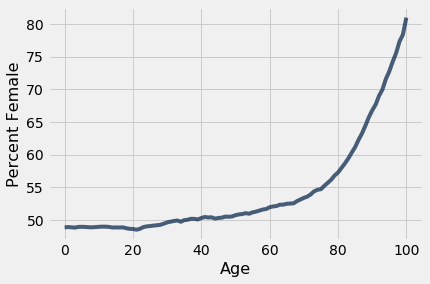

In [27]:
counts_and_percents.plot('Age', 'Percent Female')

In [28]:
pop_2014

Age,Males,Females
0,"2,017,857","1,930,493"
1,"2,023,253","1,938,870"
2,"2,022,502","1,935,270"
3,"2,048,618","1,956,572"
4,"2,043,498","1,959,950"
5,"2,043,467","1,961,391"
6,"2,110,328","2,024,024"
7,"2,122,240","2,031,760"
8,"2,105,122","2,014,402"
9,"2,097,272","2,009,560"


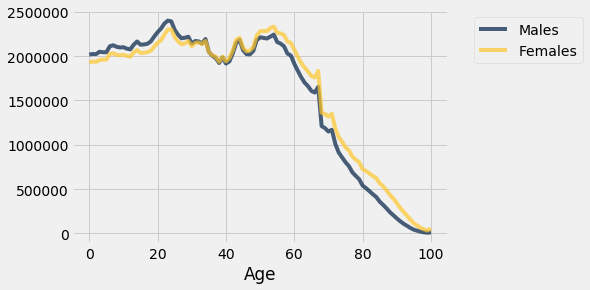

In [29]:
pop_2014.plot('Age')

In [30]:
pop_2014.where('Age', are.between(65, 75))

Age,Males,Females
65,"1,607,688","1,776,761"
66,"1,589,127","1,758,649"
67,"1,653,257","1,832,245"
68,"1,211,480","1,361,047"
69,"1,187,554","1,347,458"
70,"1,149,247","1,317,238"
71,"1,169,356","1,350,392"
72,"1,010,896","1,183,338"
73,"913,008","1,089,183"
74,"857,432","1,032,934"


In [31]:
2014 - np.arange(67, 73)

array([1947, 1946, 1945, 1944, 1943, 1942])

In [32]:
everyone

AGE,2010,2014
0,"3,951,330","3,948,350"
1,"3,957,888","3,962,123"
2,"4,090,862","3,957,772"
3,"4,111,920","4,005,190"
4,"4,077,552","4,003,448"
5,"4,064,653","4,004,858"
6,"4,073,013","4,134,352"
7,"4,043,047","4,154,000"
8,"4,025,604","4,119,524"
9,"4,125,415","4,106,832"


In [33]:
everyone = everyone.with_column(
    'Change', everyone.column('2014') - everyone.column('2010')
)

In [34]:
everyone.sort('Change', descending=True)

AGE,2010,2014,Change
67,"2,693,709","3,485,502","791,793"
64,"2,706,063","3,488,136","782,073"
66,"2,621,346","3,347,776","726,430"
65,"2,678,532","3,384,449","705,917"
71,"1,953,614","2,519,748","566,134"
34,"3,822,188","4,362,895","540,707"
23,"4,217,221","4,698,584","481,363"
59,"3,694,276","4,155,417","461,141"
24,"4,243,589","4,692,635","449,046"
70,"2,062,581","2,466,485","403,904"


In [35]:
everyone.with_column(
    'Growth Rate', (everyone.column('2014')/everyone.column('2010')) ** (1/4) - 1
).sort('Growth Rate', descending=True)

AGE,2010,2014,Change,Growth Rate
100,"54,409","72,197","17,788",0.0732777
93,"219,063","286,333","67,270",0.069241
99,"32,178","41,828","9,650",0.0677683
67,"2,693,709","3,485,502","791,793",0.0665437
71,"1,953,614","2,519,748","566,134",0.0656868
64,"2,706,063","3,488,136","782,073",0.0655256
94,"170,775","218,655","47,880",0.0637358
98,"47,037","60,185","13,148",0.0635604
66,"2,621,346","3,347,776","726,430",0.0630606
65,"2,678,532","3,384,449","705,917",0.0602244


## Scatter Plots ##

In [36]:
actors = Table.read_table('actors.csv')

In [37]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


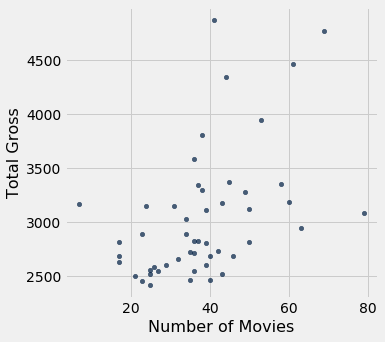

In [38]:
actors.scatter('Number of Movies', 'Total Gross')

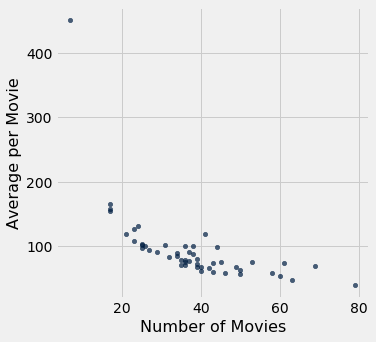

In [39]:
actors.scatter('Number of Movies', 'Average per Movie')

In [40]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
